![alt text](../img/general/header.png)

# IP core basado en ML integrado con PYNQ framework

ComBlock for PYNQ: https://github.com/Mballina42/PynQ_ComBlock

For convenience, the *comblock.py* Python script is established which contains useful constants for interacting with the ComBlock.

In [4]:
from pynq import Overlay
from pynq import MMIO
import comblock as cbc

import numpy as np
import matplotlib.pyplot as plt

## Load Overlay

In [6]:
# Load the overlay (bitstream) onto the FPGA. In the Overlays folder, you can choose if you are using a Z1 or Z2 Pynq board.

ol = Overlay("design_1_wrapper.xsa")

The information from the **comblock_0** block is read to verify everything that is obtained. Since the object is mapped to AXI Lite, it is noted that the AXI Full address is omitted.

In [7]:
## Overlay information

ol.ip_dict

{'inference_0': {'type': 'xilinx.com:hls:inference:1.0',
  'mem_id': 's_axi_control',
  'memtype': 'REGISTER',
  'gpio': {},
  'interrupts': {},
  'parameters': {'C_S_AXI_CONTROL_ADDR_WIDTH': '4',
   'C_S_AXI_CONTROL_DATA_WIDTH': '32',
   'Component_Name': 'design_1_inference_0_0',
   'clk_period': '10',
   'machine': '64',
   'combinational': '0',
   'latency': '908',
   'II': 'x',
   'EDK_IPTYPE': 'PERIPHERAL',
   'C_S_AXI_CONTROL_BASEADDR': '0x40000000',
   'C_S_AXI_CONTROL_HIGHADDR': '0x4000FFFF',
   'ADDR_WIDTH': '4',
   'DATA_WIDTH': '32',
   'PROTOCOL': 'AXI4LITE',
   'READ_WRITE_MODE': 'READ_WRITE',
   'FREQ_HZ': '76923080',
   'ID_WIDTH': '0',
   'AWUSER_WIDTH': '0',
   'ARUSER_WIDTH': '0',
   'WUSER_WIDTH': '0',
   'RUSER_WIDTH': '0',
   'BUSER_WIDTH': '0',
   'HAS_BURST': '0',
   'HAS_LOCK': '0',
   'HAS_PROT': '0',
   'HAS_CACHE': '0',
   'HAS_QOS': '0',
   'HAS_REGION': '0',
   'HAS_WSTRB': '1',
   'HAS_BRESP': '1',
   'HAS_RRESP': '1',
   'SUPPORTS_NARROW_BURST': '0',
   

## ComBlock information

In [8]:
ol.ip_dict['comblock_0']

{'type': 'www.ictp.it:user:comblock:2.0',
 'mem_id': 'AXIL',
 'memtype': 'REGISTER',
 'gpio': {},
 'interrupts': {},
 'parameters': {'REGS_IN_ENA': 'true',
  'REGS_IN_DWIDTH': '32',
  'REGS_IN_DEPTH': '3',
  'REGS_OUT_ENA': 'true',
  'REGS_OUT_DWIDTH': '32',
  'REGS_OUT_DEPTH': '2',
  'DRAM_IO_ENA': 'false',
  'DRAM_IO_DWIDTH': '16',
  'DRAM_IO_AWIDTH': '16',
  'DRAM_IO_DEPTH': '65535',
  'FIFO_IN_ENA': 'true',
  'FIFO_IN_DWIDTH': '32',
  'FIFO_IN_DEPTH': '1024',
  'FIFO_IN_AFOFFSET': '1',
  'FIFO_IN_AEOFFSET': '1',
  'FIFO_OUT_ENA': 'true',
  'FIFO_OUT_DWIDTH': '32',
  'FIFO_OUT_DEPTH': '1024',
  'FIFO_OUT_AFOFFSET': '1',
  'FIFO_OUT_AEOFFSET': '1',
  'C_AXIF_ID_WIDTH': '1',
  'C_AXIF_AWUSER_WIDTH': '1',
  'C_AXIF_ARUSER_WIDTH': '1',
  'C_AXIF_WUSER_WIDTH': '1',
  'C_AXIF_RUSER_WIDTH': '1',
  'C_AXIF_BUSER_WIDTH': '1',
  'Component_Name': 'design_1_comblock_0_0',
  'C_AXIF_BASEADDR': '0xFFFFFFFF',
  'C_AXIF_HIGHADDR': '0x00000000',
  'EDK_IPTYPE': 'PERIPHERAL',
  'C_AXIL_BASEADDR': '0

In [16]:
# The object is created based on the comblock_0 IP

cb = ol.comblock_0

## HLS IP core based on ML

In [17]:
hls_ip = ol.inference_0 

In [18]:
# Initialize HLS IP core

#hls_ip.register_map

CONTROL_REGISTER = 0x0
hls_ip.write(CONTROL_REGISTER, 0x81) # 0x81 will set bit 0


## Data preparation 

In [19]:
def float_to_fixed8(x):
    """Convert float to 8-bit fixed-point (Q0.8 format)."""
    fixed = round(x * 256)  # Scale by 2^8 (256)
    fixed = max(-128, min(127, fixed))  # Clamp to 8-bit range (-128 to 127)
    return fixed

# Example usage
float_val = 0.5
fixed_val = float_to_fixed8(float_val)
print(f"Fixed-point representation: {fixed_val}")


Fixed-point representation: 127


In [27]:
from pynq import allocate
import numpy as np

data_size = 28*28
input_buffer_int = allocate(shape=(data_size,), dtype=np.int8)

In [25]:
signal = [ 
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  12,   0, 6, 206, 253, 140,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,  77, 251, 210,  25,   0, 0,   0, 122, 248, 253,  65,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,  18, 0,   0,   0,   0, 209, 253, 253,  65,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0, 117, 247, 253, 198,  10,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,  76, 247, 253, 231,  63,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0, 128, 253, 253, 144,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0, 176, 246, 253, 159,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 234, 253, 233,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 198, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 248, 253, 189,  12,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,  19, 200, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0, 134, 253, 253, 173,  12,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0, 248, 253, 253,  25,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  43,  20,  20,  20,  20,   5,   0,   5,  20,  20,  37, 150, 150, 150, 147,  10, 0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253, 253, 253, 253, 253, 253, 168, 143, 166, 253, 253, 253, 253, 253, 253, 253, 123,   0,   0,   0,   0,   0,   0,   0,   0,   0, 174, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 249, 247, 247, 169, 117, 117,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0, 118, 123, 123, 123, 166, 253, 253, 253, 155, 123, 123,  41, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0,   0,   0,   0
         ]

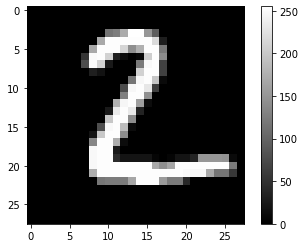

In [36]:
imageArray = np.array(signal)

image_2d = imageArray.reshape((28, 28))

# Display as an image
plt.imshow(image_2d, cmap='gray', interpolation='nearest')
plt.colorbar()  # Optional: Show color scale
plt.show()


## Interacting with ComBlock 

### Write FIFO

In [28]:
# Send data to the ComBlock's FIFO

for i in range(data_size):
       cb.write(cbc.OFIFO_VALUE, signal[i])


### Read registers

In [29]:
# Read IREG1 to obtain the result of the inferece process 

cb.read(cbc.IREG1)

2

In [30]:
input_buffer_int.dtype

dtype('int8')